In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

In [2]:
#load the boston data
boston=load_boston()

#create a dataframe using boston dataset
df=pd.DataFrame(boston.data)

In [3]:
#look into the first five rows of the data 
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
#rename column names into feature names
df.columns=boston.feature_names

#look into the first five rows of the data
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
#get the target values and add it to the data
df['PRICE']=boston.target

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
#get info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
#statistical data 
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
#get feature columns and output column
X=df.drop(labels='PRICE',axis=1) #feature dataframe

y=df['PRICE'] #target vector


In [9]:
#split into training and test data
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=52)

print(X_train.shape,X_test.shape)

(354, 13) (152, 13)


In [10]:
#create linear regression model
lr=LinearRegression()

#fit the training examples
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#predict on the training data
y_train_pred=lr.predict(X_train)

#calculate train evaluation metrics
print("MSE: ",metrics.mean_squared_error(y_train_pred,y_train))
print("MAE: ",metrics.mean_absolute_error(y_train_pred,y_train))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_train_pred,y_train)))
print("R2 SCORE: ",metrics.r2_score(y_train_pred,y_train))

MSE:  21.435189486563274
MAE:  3.244466190421396
RMSE:  4.629815275641489
R2 SCORE:  0.5864782366149665


In [12]:
#predict on the testing data
y_test_pred=lr.predict(X_test)

#calculate train evaluation metrics
print("MSE: ",metrics.mean_squared_error(y_test_pred,y_test))
print("MAE: ",metrics.mean_absolute_error(y_test_pred,y_test))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test_pred,y_test)))
print("R2 SCORE: ",metrics.r2_score(y_test_pred,y_test))

MSE:  25.383910468415603
MAE:  3.257062005208542
RMSE:  5.038244780517874
R2 SCORE:  0.6394801781333868


In [13]:
#plot learning curves

#import learning_curve()
from sklearn.model_selection import learning_curve


In [14]:
#get the train and validation scores with metric as MSE

#plot learning curves on train data with 5 fold cross validation
train_sizes,train_score,validation_score=learning_curve(estimator=LinearRegression(), X=X_train, y=y_train)

#calculate mean of errors
train_score_mean= -train_score.mean(axis=1)
validation_score_mean=-validation_score.mean(axis=1)

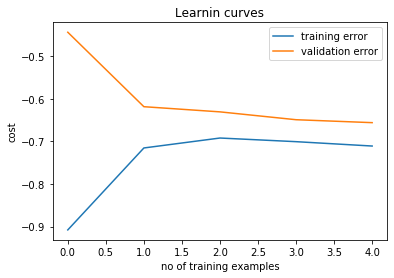

In [15]:
#plot the learnig curves
plt.plot(train_score_mean)
plt.plot(validation_score_mean)

#name the axes
plt.xlabel("no of training examples")
plt.ylabel("cost")

plt.title("Learnin curves")

#create legend
plt.legend(["training error","validation error"])

#show the plot
plt.show()

In [16]:
#train the model with standard normalizer
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

#fit the scaler
scaler.fit(X)

#scale the features
X_scaled=scaler.transform(X)

In [38]:
#split training and testing data

X_scaled_train,X_scaled_test,y_train_scaled,y_test_scaled= train_test_split(X_scaled, y,test_size=0.3,random_state=52)

#create a linear regression model 
lr_scaled=LinearRegression()

#fit the model
lr_scaled.fit(X_scaled_train,y_train)

#predict the training data
y_pred_train=lr_scaled.predict(X_scaled_train)

#calculate the metrics
print("MSE: ",metrics.mean_squared_error(y_train_pred,y_train_scaled))
print("MAE: ",metrics.mean_absolute_error(y_train_pred,y_train_scaled))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_train_pred,y_train_scaled)))
print("R2 SCORE: ",metrics.r2_score(y_train_pred,y_train_scaled))

MSE:  29.739696398911615
MAE:  4.196021705023987
RMSE:  5.45341144595854
R2 SCORE:  0.6537595053572614


In [39]:
#calculate prediction on test set
y_pred_test=lr_scaled.predict(X_scaled_test)

#calculate the metrics
print("MSE: ",metrics.mean_squared_error(y_test_pred,y_test_scaled))
print("MAE: ",metrics.mean_absolute_error(y_test_pred,y_test_scaled))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test_pred,y_test_scaled)))
print("R2 SCORE: ",metrics.r2_score(y_test_pred,y_test_scaled))

MSE:  25.383910468415603
MAE:  3.257062005208542
RMSE:  5.038244780517874
R2 SCORE:  0.6394801781333868


In [40]:
#add polynomial features to data
from sklearn.preprocessing import PolynomialFeatures

#create an object of polynomial feature
poly=PolynomialFeatures(2)

#transform the input data
X_poly=poly.fit_transform(X)

#print first five rows of X_poly
pd.DataFrame(X_poly).head()

,0,1,2,3,4,5,6,7,8,9,...,95,96,97,98,99,100,101,102,103,104
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,...,87616.0,4528.8,117482.40,1474.08,234.09,6072.570,76.194,157529.6100,1976.5620,24.8004
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,...,58564.0,4307.6,96049.80,2211.88,316.84,7064.820,162.692,157529.6100,3627.6660,83.5396
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,...,58564.0,4307.6,95064.86,975.26,316.84,6992.374,71.734,154315.4089,1583.1049,16.2409
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,...,49284.0,4151.4,87607.86,652.68,349.69,7379.581,54.978,155732.8369,1160.2122,8.6436
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,...,49284.0,4151.4,88111.80,1183.26,349.69,7422.030,99.671,157529.6100,2115.4770,28.4089


In [41]:
#create a linear regression model
lr_poly=LinearRegression()

#split training and test data
X_poly_train, X_poly_test, y_train_poly, y_test_poly=train_test_split(X_poly,y,test_size=0.3,random_state=52)

#fit the training data
lr_poly.fit(X_poly_train,y_train)

#get predictions
y_train_pred=lr_poly.predict(X_poly_train)

#calculate the metrics
print("MSE: ",metrics.mean_squared_error(y_train_pred,y_train_poly))
print("MAE: ",metrics.mean_absolute_error(y_train_pred,y_train_poly))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_train_pred,y_train_poly)))
print("R2 SCORE: ",metrics.r2_score(y_train_pred,y_train_poly))

MSE:  29.739696398911615
MAE:  4.196021705023987
RMSE:  5.45341144595854
R2 SCORE:  0.6537595053572614


In [42]:
#calculate prediction on test set
y_pred_test=lr_poly.predict(X_poly_test)

#calculate the metrics
print("MSE: ",metrics.mean_squared_error(y_test_pred,y_test_poly))
print("MAE: ",metrics.mean_absolute_error(y_test_pred,y_test_poly))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test_pred,y_test_poly)))
print("R2 SCORE: ",metrics.r2_score(y_test_pred,y_test_poly))

MSE:  25.383910468415603
MAE:  3.257062005208542
RMSE:  5.038244780517874
R2 SCORE:  0.6394801781333868


In [43]:
#plot learning curves on train data with 5 fold cross validation
train_sizes,train_score,validation_score=learning_curve(estimator=LinearRegression(), X=X_poly_train, y=y_train)

#calculate mean of errors
train_score_mean= -train_score.mean(axis=1)
validation_score_mean=-validation_score.mean(axis=1)

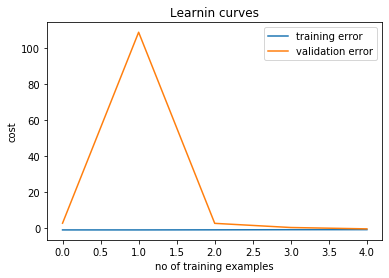

In [44]:
#plot the learnig curves
plt.plot(train_score_mean)
plt.plot(validation_score_mean)

#name the axes
plt.xlabel("no of training examples")
plt.ylabel("cost")

plt.title("Learnin curves")

#create legend
plt.legend(["training error","validation error"])

#show the plot
plt.show()

In [48]:
#claculate score on training set
print("training score with polynomial features: ",lr_poly.score(X_poly_train,y_train_poly))

#calculate score on test set
print("test score with polynomial features: ",lr_poly.score(X_poly_test,y_test_poly))

#claculate score on training set
print("training score with scaled features: ",lr_scaled.score(X_scaled_train,y_train_scaled))

#calculate score on test set
print("test score with scaled features: ",lr_scaled.score(X_scaled_test,y_test_scaled))

#claculate score on training set
print("training score with normal features: ",lr.score(X_train,y_train))

#calculate score on test set
print("test score with normal features: ",lr.score(X_test,y_test))

training score with polynomial features:  0.594113062086926
test score with polynomial features:  0.3131366621208228
training score with scaled features:  0.7074528499690372
test score with scaled features:  0.7674000927955618
training score with normal features:  0.7074528499690372
test score with normal features:  0.7674000927955633


In [49]:
#import pipeline
from sklearn.pipeline import Pipeline

steps=[('scaler',StandardScaler()),('polynomial',PolynomialFeatures()),('model',LinearRegression())]

#create a pipeline
pipeline=Pipeline(steps)

#fit the training data
pipeline.fit(X_train,y_train)

#calculate the scores
print("Training scores with scaled polynomial features: ",pipeline.score(X_train,y_train))
print("Test score with scaled polynomial features: ",pipeline.score(X_test,y_test))

Training scores with scaled polynomial features:  0.9195265938846464
Test score with scaled polynomial features:  0.8676242140414002


In [55]:
#calculate price with linear regression along with polynomial features and regularization

from sklearn.linear_model import Ridge

steps=[('scaler',StandardScaler()),('polynomial',PolynomialFeatures()),('model',Ridge())]

#create a pipeline
pipeline=Pipeline(steps)

#fit the training data
pipeline.fit(X_train,y_train)

#calculate the scores
print("Training scores with scaled polynomial features: ",pipeline.score(X_train,y_train))
print("Test score with scaled polynomial features: ",pipeline.score(X_test,y_test))

Training scores with scaled polynomial features:  0.916303058675203
Test score with scaled polynomial features:  0.8813962408985534


In [71]:
#calculate MSE
print("MSE of training data: ",metrics.mean_squared_error(pipeline.predict(X_train),y_train))
print("MSE of test data: ",metrics.mean_squared_error(pipeline.predict(X_test),y_test))

MSE of training data:  7.957487775523239
MSE of test data:  12.65972638128747


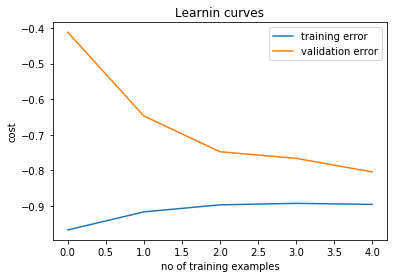

In [72]:
#plot learning curves on train data with 5 fold cross validation
train_sizes,train_score,validation_score=learning_curve(estimator=pipeline, X=X_train, y=y_train)

#calculate mean of errors
train_score_mean= -train_score.mean(axis=1)
validation_score_mean=-validation_score.mean(axis=1)

#plot the learnig curves
plt.plot(train_score_mean)
plt.plot(validation_score_mean)

#name the axes
plt.xlabel("no of training examples")
plt.ylabel("cost")

plt.title("Learnin curves")

#create legend
plt.legend(["training error","validation error"])

#show the plot
plt.show()

In [59]:
#calculate price with linear regression along with polynomial features and regularization with higher alpha

from sklearn.linear_model import Ridge

steps=[('scaler',StandardScaler()),('polynomial',PolynomialFeatures()),('model',Ridge(alpha=10))]

#create a pipeline
pipeline=Pipeline(steps)

#fit the training data
pipeline.fit(X_train,y_train)

#calculate the scores
print("Training scores with scaled polynomial features: ",pipeline.score(X_train,y_train))
print("Test score with scaled polynomial features: ",pipeline.score(X_test,y_test))

Training scores with scaled polynomial features:  0.9036956645450588
Test score with scaled polynomial features:  0.8859618718718303


In [60]:
#calculate MSE
print("MSE of training data: ",metrics.mean_squared_error(pipeline.predict(X_train),y_train))
print("MSE of test data: ",metrics.mean_squared_error(pipeline.predict(X_test),y_test))

MSE of training data:  7.056304184251104
MSE of test data:  12.445119472240071


In [67]:
#try a model with intercepts only polynomial features
steps=[('scaler',StandardScaler()),('polynomial',PolynomialFeatures(interaction_only=True)),('model',Ridge(alpha=10))]

#create a pipeline
pipeline=Pipeline(steps)

#fit the training data
pipeline.fit(X_train,y_train)

#calculate the scores
print("Training scores with scaled polynomial features: ",pipeline.score(X_train,y_train))
print("Test score with scaled polynomial features: ",pipeline.score(X_test,y_test))

Training scores with scaled polynomial features:  0.8913963241801605
Test score with scaled polynomial features:  0.8839953684368309


In [68]:
#calculate MSE
print("MSE of training data: ",metrics.mean_squared_error(pipeline.predict(X_train),y_train))
print("MSE of test data: ",metrics.mean_squared_error(pipeline.predict(X_test),y_test))

MSE of training data:  7.957487775523239
MSE of test data:  12.65972638128747


In [69]:
#plot learning curves on train data with 5 fold cross validation
train_sizes,train_score,validation_score=learning_curve(estimator=pipeline, X=X_train, y=y_train)

#calculate mean of errors
train_score_mean= -train_score.mean(axis=1)
validation_score_mean=-validation_score.mean(axis=1)

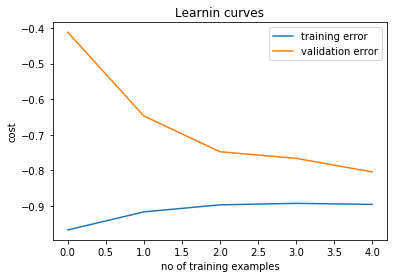

In [70]:
#plot the learnig curves
plt.plot(train_score_mean)
plt.plot(validation_score_mean)

#name the axes
plt.xlabel("no of training examples")
plt.ylabel("cost")

plt.title("Learnin curves")

#create legend
plt.legend(["training error","validation error"])

#show the plot
plt.show()

In [75]:
#train model with Lasso model

from sklearn.linear_model import Lasso

steps=[('scaler',StandardScaler()),('polynomial',PolynomialFeatures()),('model',Lasso())]

#create a pipeline
pipeline=Pipeline(steps)

#fit the training data
pipeline.fit(X_train,y_train)

#calculate the scores
print("Training scores with scaled polynomial features: ",pipeline.score(X_train,y_train))
print("Test score with scaled polynomial features: ",pipeline.score(X_test,y_test))

Training scores with scaled polynomial features:  0.750415881187929
Test score with scaled polynomial features:  0.736719919634852


In [76]:
#calculate MSE
print("MSE of training data: ",metrics.mean_squared_error(pipeline.predict(X_train),y_train))
print("MSE of test data: ",metrics.mean_squared_error(pipeline.predict(X_test),y_test))

MSE of training data:  18.28725003476341
MSE of test data:  28.732075040048464


In [77]:
#plot learning curves on train data with 5 fold cross validation
train_sizes,train_score,validation_score=learning_curve(estimator=pipeline, X=X_train, y=y_train)

#calculate mean of errors
train_score_mean= -train_score.mean(axis=1)
validation_score_mean=-validation_score.mean(axis=1)

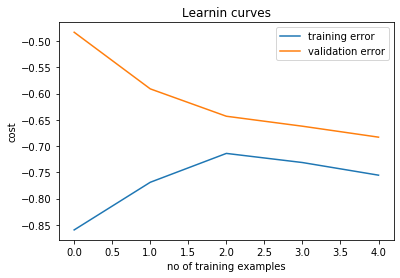

In [78]:
#plot the learnig curves
plt.plot(train_score_mean)
plt.plot(validation_score_mean)

#name the axes
plt.xlabel("no of training examples")
plt.ylabel("cost")

plt.title("Learnin curves")

#create legend
plt.legend(["training error","validation error"])

#show the plot
plt.show()